# Ensemble(Boosting : Adaboost, GBM, XGBoost) 실습

보스턴 집값을 Adaboost, GBM, XGBoost 3가지를 이용하여 예측해보자 

## Adaboost (Adaptive Boosting)
+ 과소적합(underfitted)됐던 학습 데이터 샘플의 가중치를 높이면서 새로 학습된 모델이 학습하기 어려운 데이터에 더 잘 적합되도록 하는 방식.


+ 전체 학습 데이터셋으로 모델 -> 잘못 예측(분류)된 샘플의 가중치 상대적으로 높여줌 -> 그 다음 두 번쨰 모델을 학습 시킬 때 이렇게 업데이트된 가중치를 반영하여 학습 -> 이와 같은 과정반복


In [3]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

In [4]:
boston = datasets.load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
print(boston.data.shape)

(506, 13)


In [6]:
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

adaboost는 기본적으로 base model을 decision tree를 활용하며, 주요 파라미터를 estimator 수와 learning rate를 조절한다.
+ estimator: 모형의 수
+ learning rate: 최적화 알고리즘의 튜닝 매개 변수로써 최소 손실 함수를 위해 필요함. 
기계 학습 및 통계에서 학습 속도는 최소 손실 함수를 향해 이동하면서 각 반복에서 단계 크기를 결정하는 최적화 알고리즘의 튜닝 매개 변수

In [7]:
ada = AdaBoostRegressor(n_estimators=10,learning_rate=0.1) 
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

In [8]:
mse= metrics.mean_squared_error(y_test, y_pred)
print("RMSE:",np.sqrt(mse))

RMSE: 4.350440490149309


각 모델의 error를 출력해볼 수 있다.현재 estimator를 10개로 설정하였기 때문에, error는 총 10개가 나올것이다.

In [9]:
print((ada.estimator_errors_))

[0.10923175 0.12053966 0.12464005 0.11091553 0.11973392 0.11578149
 0.12015104 0.13030013 0.11319467 0.23476693]


기본 디폴트 base model(DecisionTreeRegressor(max_depth=3)) 이외의 다른 base model을 사용해보자.  
SVC를 base model로 사용하여 성능을 확인해보자.

In [10]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')

In [11]:
ada_svr =AdaBoostRegressor(n_estimators=10,  base_estimator=svr, learning_rate=0.1)
ada_svr.fit(X_train, y_train)
y_pred = ada_svr.predict(X_test)

In [12]:
mse= metrics.mean_squared_error(y_test, y_pred)
print("RMSE:",np.sqrt(mse))

RMSE: 4.490574516749212


## GBM(Gradient Boosting Machine)

+ Adaboost 처럼 학습된 모델의 오차를 보완하는 방향으로 모델을 추가해주는 방법은 동일.


+ but, Adaboost처럼 학습단계 마다 데이터 샘플의 가중치를 업데이트 해주는 것이 아니라 학습 전단계 모델에서의 잔여 오차(residual error)에 대해 새로운 모델을 학습시키는 방법.



GBM은 마찬가지로 scikit-learn의 ensemble 안에 함수가 구현되어있다. 위에서 사용했던 데이터에 대해 그대로 적용해본다.

In [13]:
from sklearn.ensemble import GradientBoostingRegressor
GBM_reg = GradientBoostingRegressor(n_estimators=10, learning_rate=0.1, max_depth=2)
GBM_reg.fit(X_train, y_train)
y_pred = GBM_reg.predict(X_test)
mse= metrics.mean_squared_error(y_test, y_pred)
print("RMSE:",np.sqrt(mse))

RMSE: 5.004565570874461


estimator의 수에 따른 RMSE의 변화를 한번 살펴보자

In [14]:
est_list = [10,20,30,40,50]
for n_estimator in est_list:
    GBM_reg = GradientBoostingRegressor(n_estimators=n_estimator, learning_rate=0.1, max_depth=2)
    GBM_reg.fit(X_train, y_train)
    y_pred = GBM_reg.predict(X_test)
    mse= metrics.mean_squared_error(y_test, y_pred)
    print("RMSE:",np.sqrt(mse))
    print("========================")

RMSE: 5.004565570874461
RMSE: 3.915026440201808
RMSE: 3.579167424555294
RMSE: 3.497012456560868
RMSE: 3.4724918798931355


estimator의 수가 증가함에 따라 테스트 성능인 RMSE가 낮아짐을 확인 할 수 있다.

GBM 또한 다른 Tree 계열들처럼 변수별 가중치와 중요도를 확인 할 수 있다. 이를 차트로 표현해보면 다음과 같다.

Text(0, 0.5, 'Feature Importance Score')

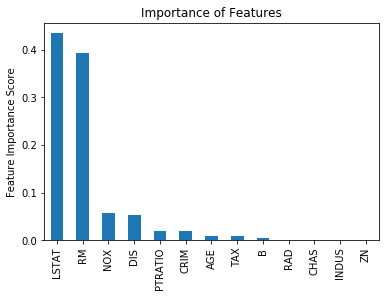

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
feat_imp = pd.Series(GBM_reg.feature_importances_, boston.feature_names).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

## XGBoost(Extreme Gradient Boosting)

In [18]:
import xgboost as xgb

In [19]:
xg_reg = xgb.XGBRegressor(learning_rate = 0.1,max_depth = 2, n_estimators = 10)

비록 scikit-learn 패키지 안에 xgboost가 있지 않지만 사용하는 방식은 매우 흡사하다.

학습하고자 할때는 fit 함수를, 예측값을 얻고자 할때는 predict함수를 그대로 사용하면된다.

In [20]:
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)

[15:05:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [21]:
mse= metrics.mean_squared_error(y_test, y_pred)
print("RMSE:",np.sqrt(mse))

RMSE: 9.105124453569804


결과를 보면, 아쉽게도 성능이 위에서 진행한 boosting 알고리즘에 비해 좋지 못한것을 볼 수 있다. XGBoost의 경우 파라미터 튜닝이 매우 중요한 요소인 알고리즘이다. 파라미터 튜닝의 경우는 다음에 따로 다루기로 한다.

XGboost도 마찬가지로 feature importance를 확인할 수 있다.

Text(0, 0.5, 'Feature Importance Score')

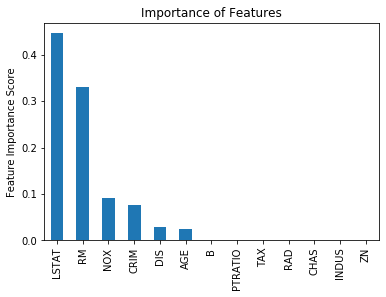

In [22]:
feat_imp = pd.Series(xg_reg.feature_importances_, boston.feature_names).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

위의 GBM 모델과는 다른 Feature Importance를 확인할 수 있다